In [55]:
import pandas as pd
pd.set_option('display.max_columns', 200)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')
import matplotlib_inline
from pathlib import Path
# get higher quality plots
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5
import numpy as np
from pathlib import Path

In [56]:
%load_ext autoreload
%autoreload 1
%aimport src.models.calc_eui

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [57]:
DATA_PATH = Path("../../data")

In [58]:
df = pd.read_csv(DATA_PATH.joinpath("processed", "KNN_data.csv"))

In [59]:
# reorder columns
cols = ['E (kWh)', 'G(therms)', 'O(gallon)', 'Building Gross Footage',
        'Building Code', 'distance_from_GSU (mi)', 'year_built', 'Stories', 'Height']
df = df[cols]

In [60]:
df.head()

,E (kWh),G(therms),O(gallon),Building Gross Footage,Building Code,distance_from_GSU (mi),year_built,Stories,Height
0,13205241.58,1658548.0,253894.7,384941.16,500,0.8,2000.0,19,195.0
1,15476.00,852.0,2571.7,4961.74,506,0.6,1910.0,5,44.0
2,83808.00,9248.0,0.0,4951.86,535,0.6,1910.0,5,44.0
3,21382.00,7269.0,0.0,8621.75,508,0.4,1901.0,5,40.0
4,1201216.00,4408.0,99773.0,203525.46,509,0.8,1926.0,10,80.0


Text(0.5, 1.0, 'Correlation of Features with E (kWh)')

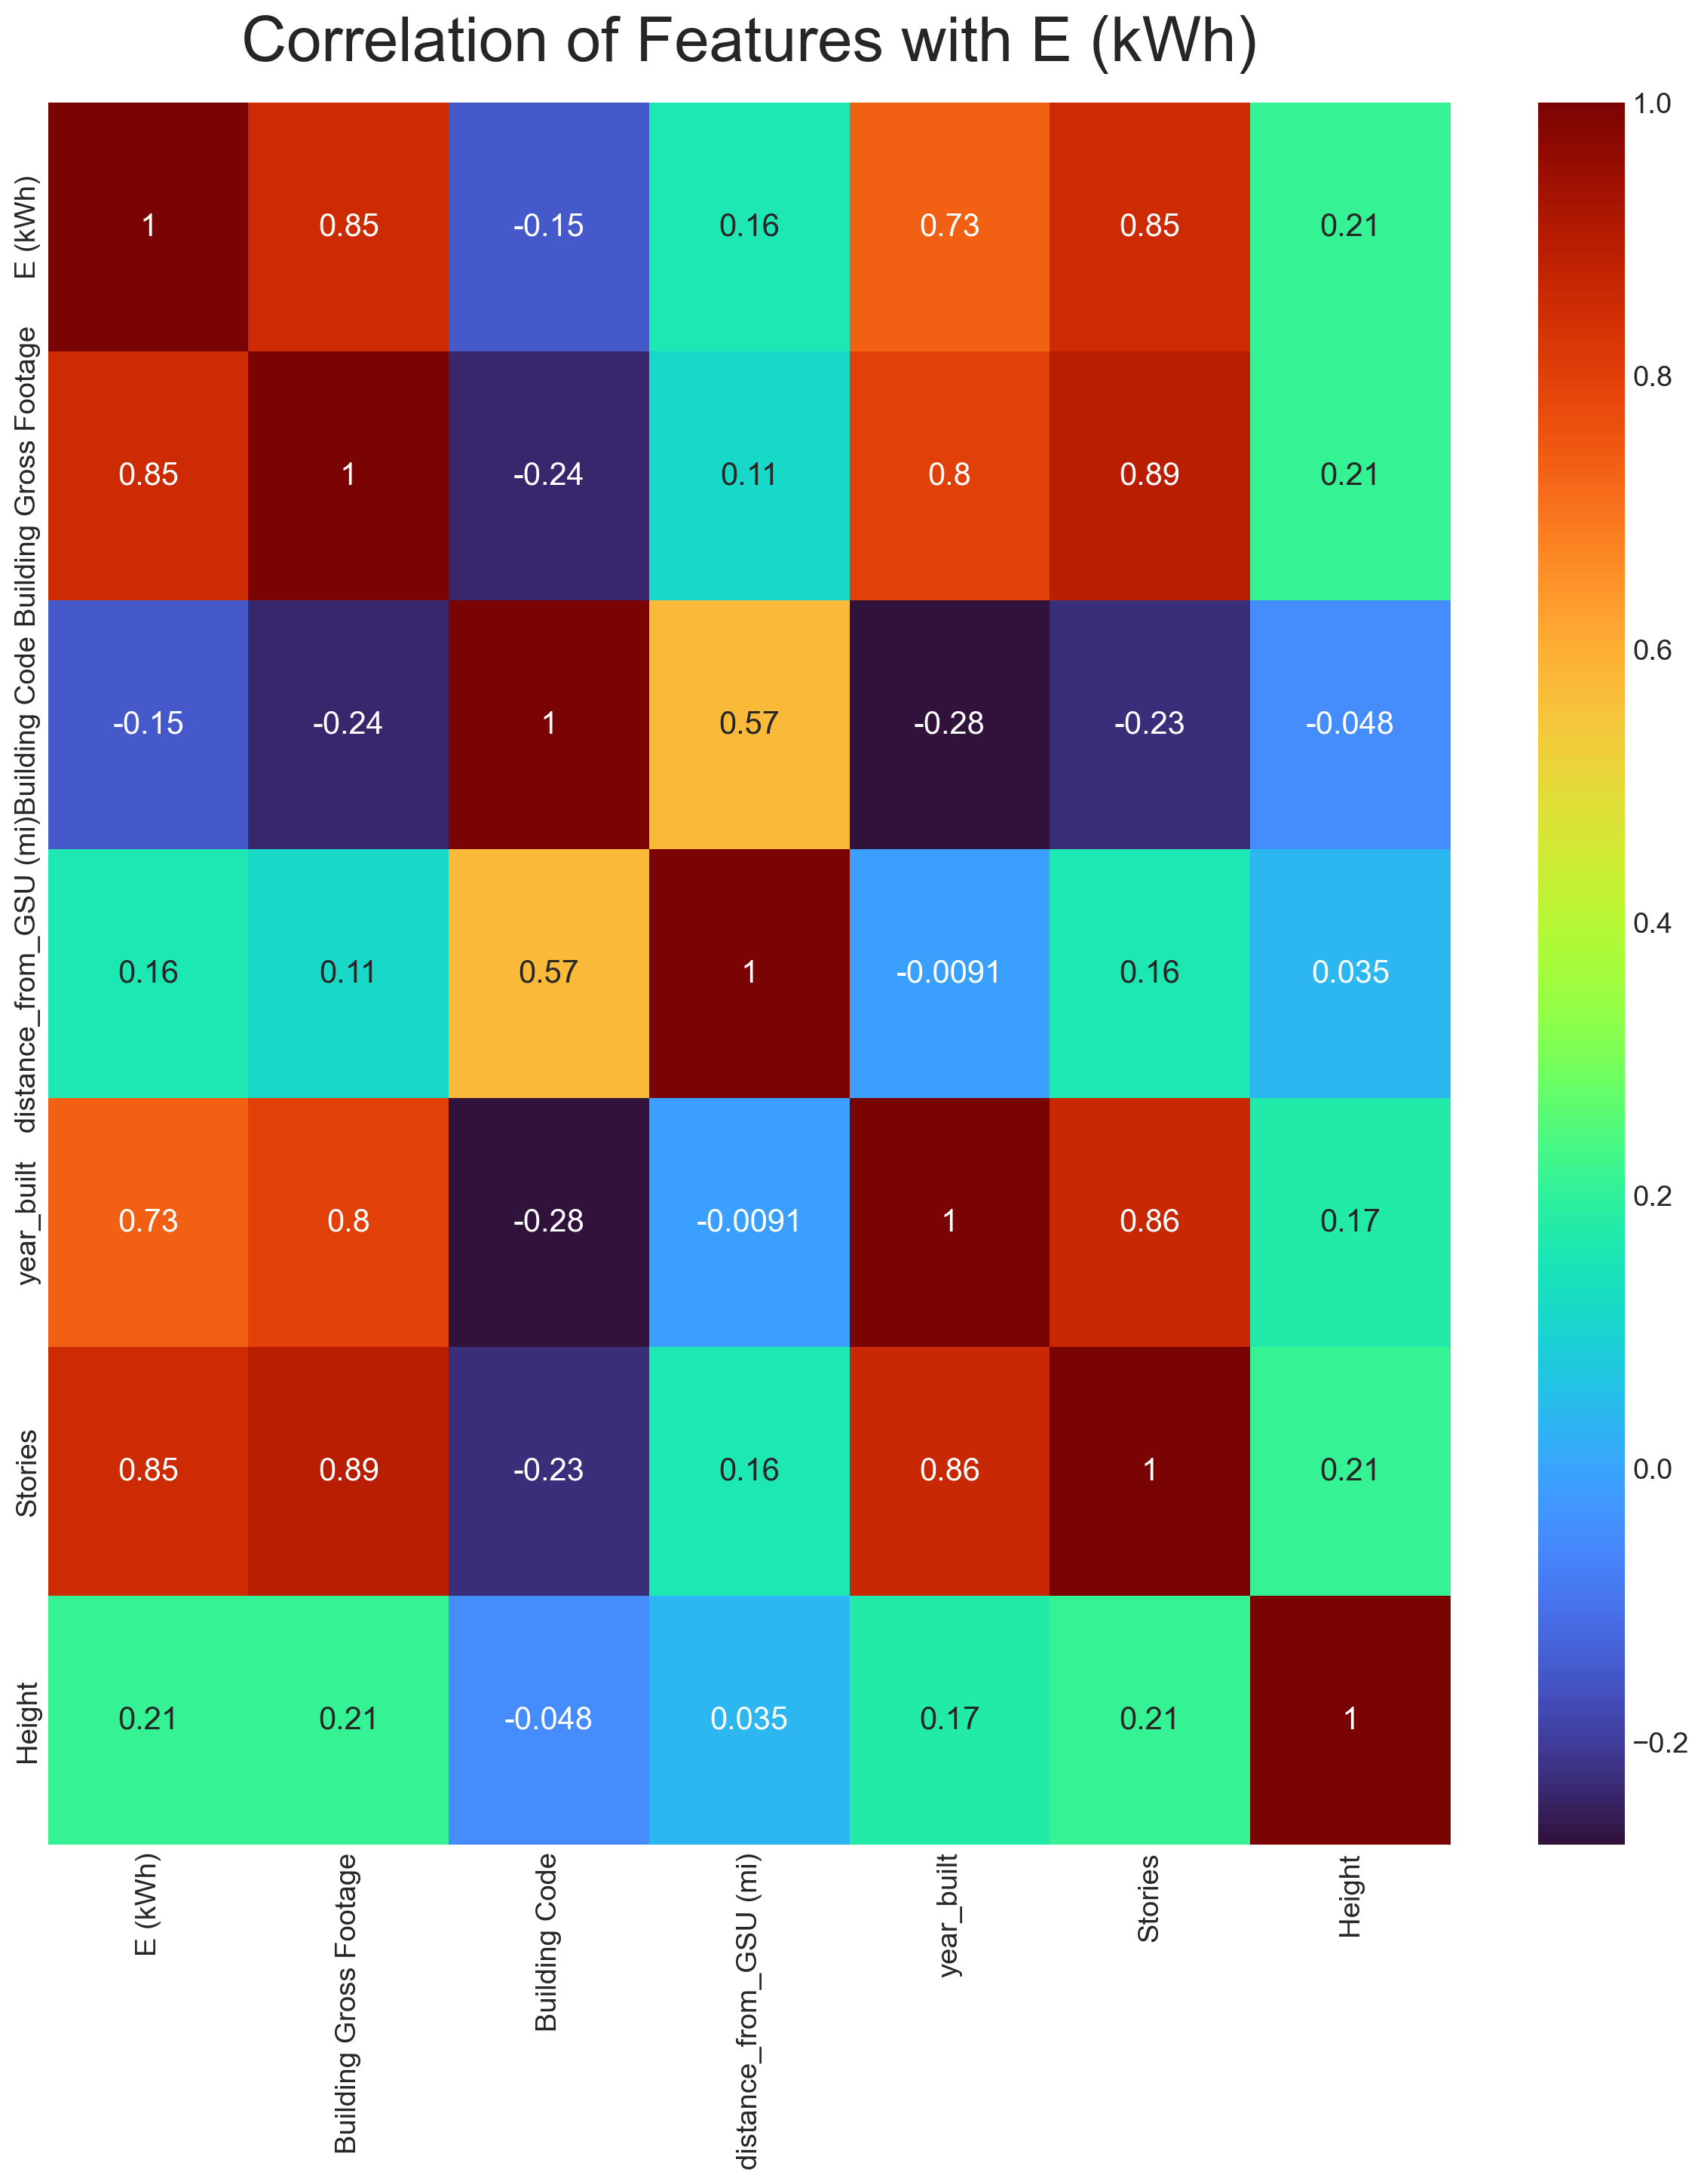

In [61]:
df_E_train = df[(df['E (kWh)'] > 0)].drop(['G(therms)', 'O(gallon)'], axis=1)
p_corr = df_E_train.corr(method='pearson')
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
sns.heatmap(p_corr, annot=True, cmap='turbo', ax=ax)
ax.set_title('Correlation of Features with E (kWh)', fontsize=30, pad=20)

In [62]:
fig.savefig('../../reports/figures/corr_E.svg', bbox_inches='tight')

In [63]:
df_E_train.head()

,E (kWh),Building Gross Footage,Building Code,distance_from_GSU (mi),year_built,Stories,Height
0,13205241.58,384941.16,500,0.8,2000.0,19,195.0
1,15476.00,4961.74,506,0.6,1910.0,5,44.0
2,83808.00,4951.86,535,0.6,1910.0,5,44.0
3,21382.00,8621.75,508,0.4,1901.0,5,40.0
4,1201216.00,203525.46,509,0.8,1926.0,10,80.0


Text(0.5, 1.0, 'Correlation of Features with G (therms)')

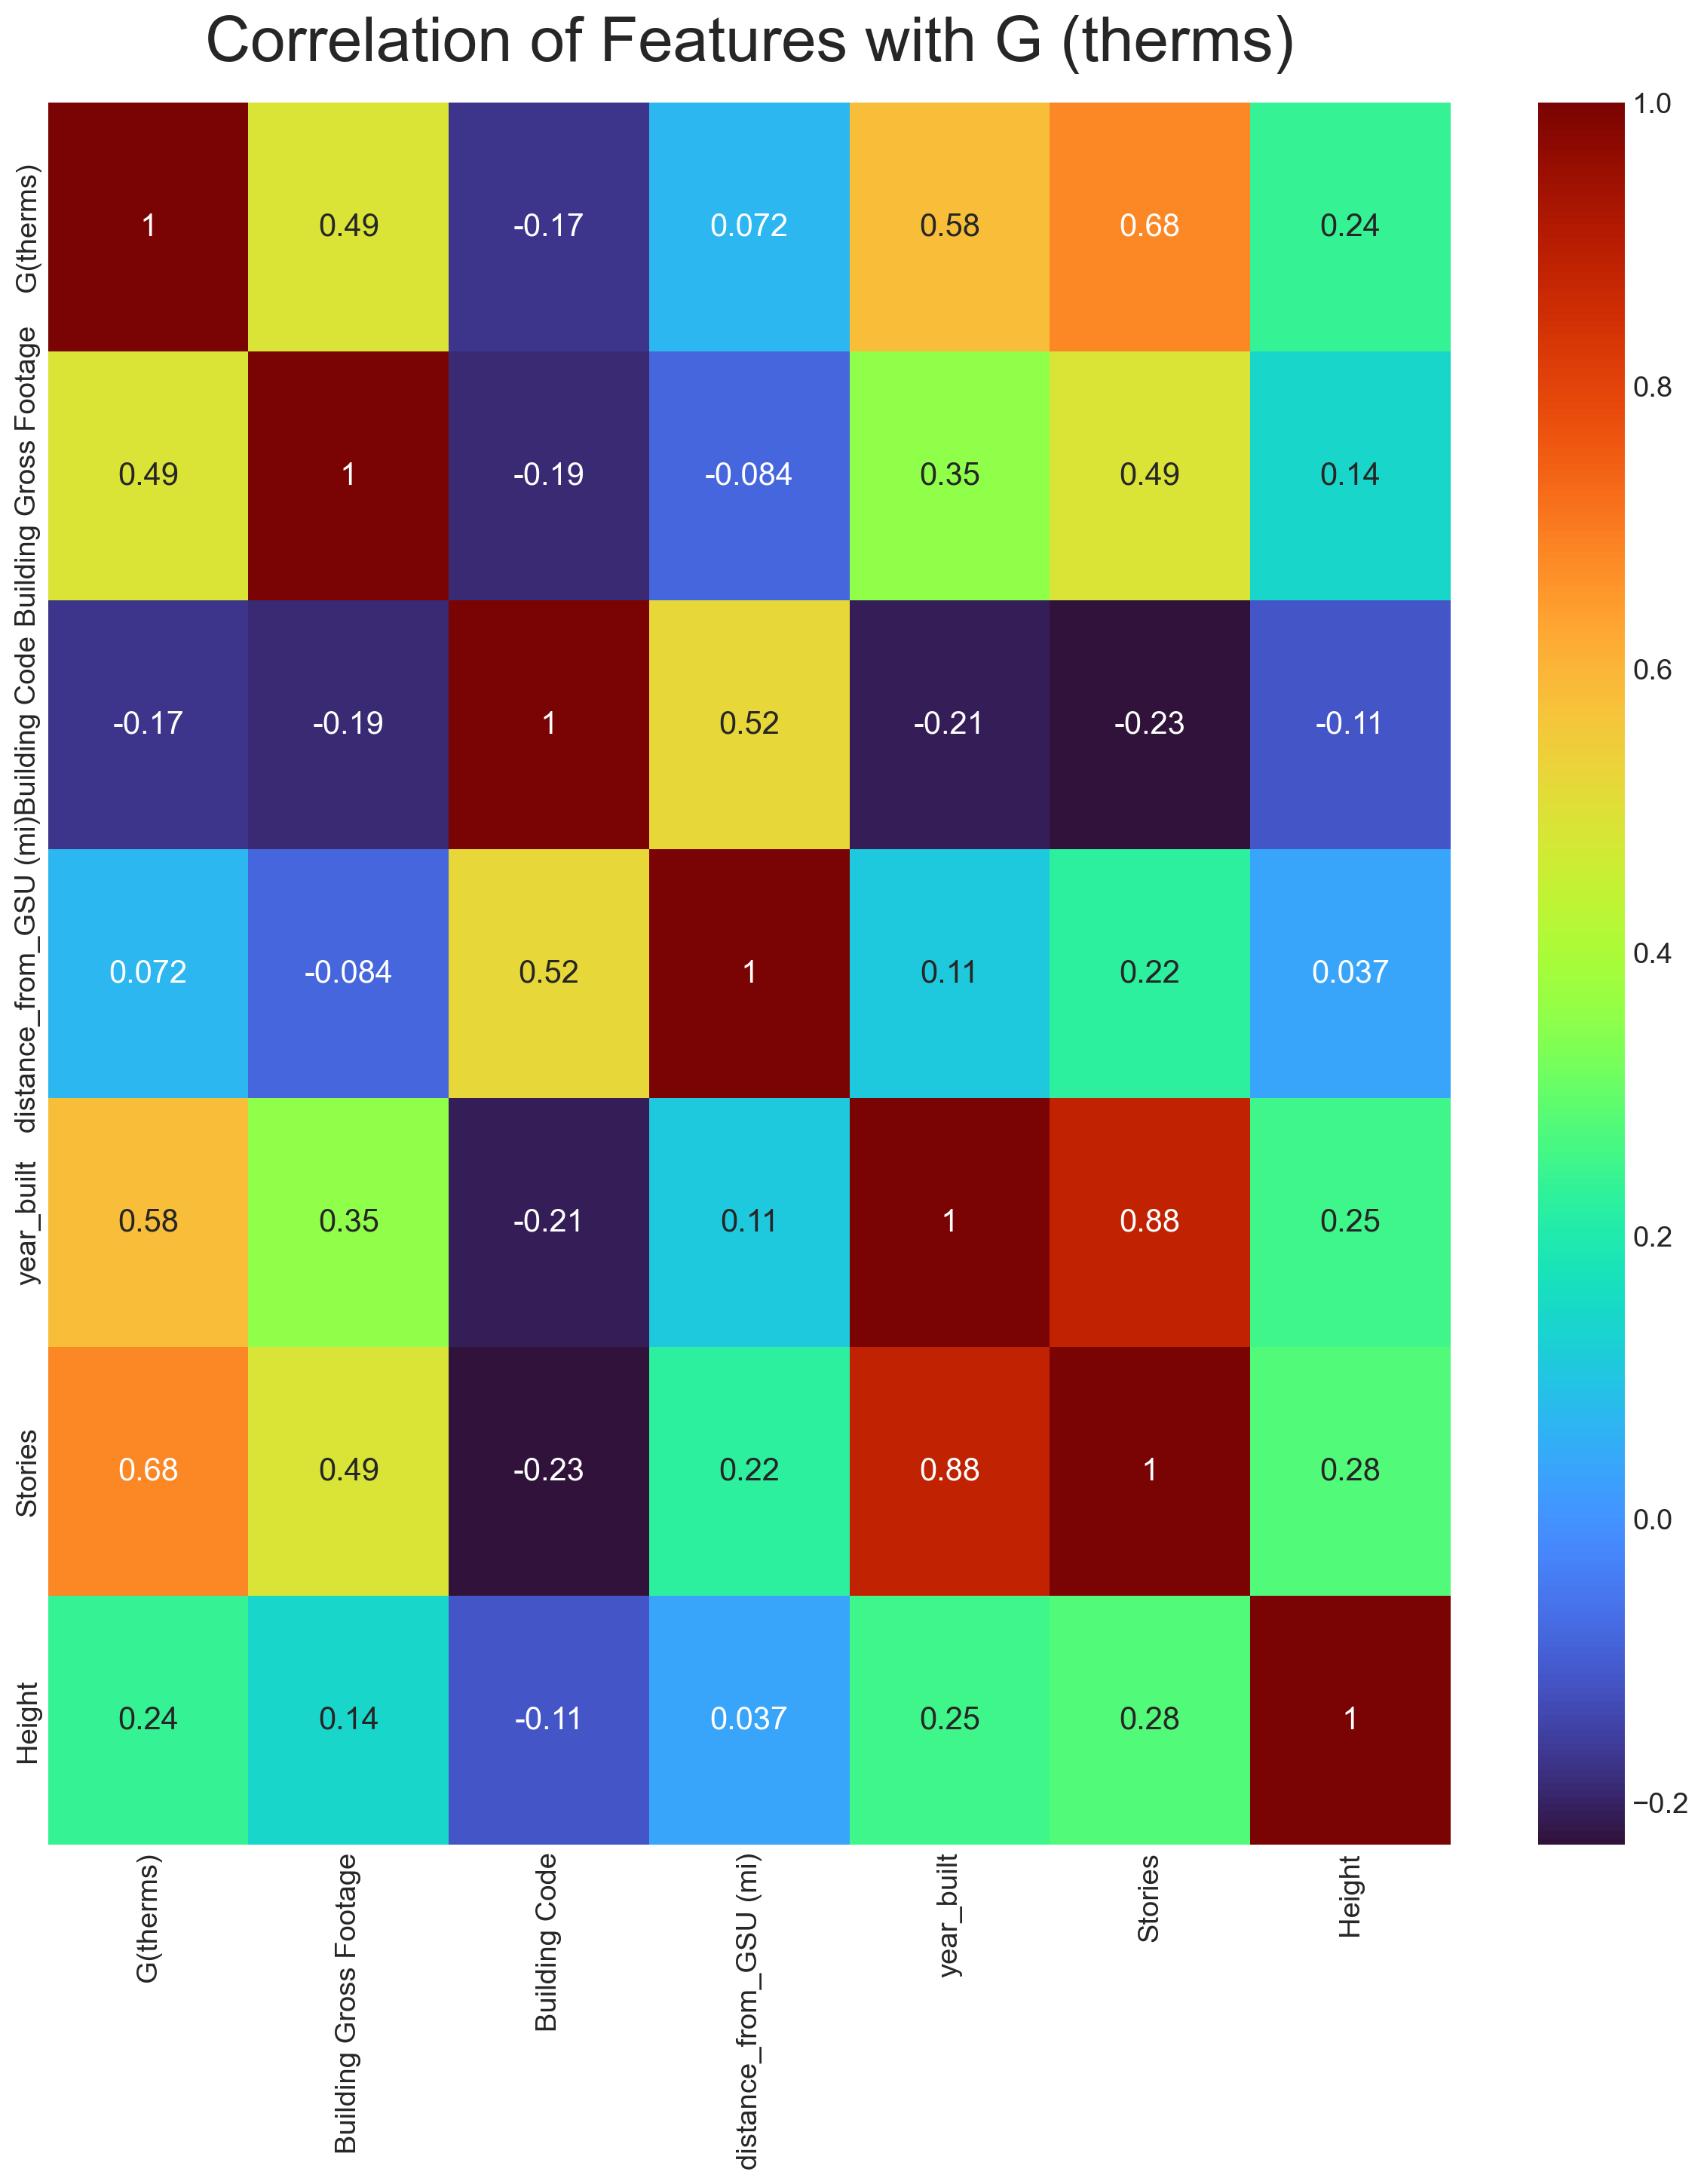

In [64]:
df_G_train = df[(df['G(therms)'] > 0)].drop(['E (kWh)', 'O(gallon)'], axis=1)
p_corr = df_G_train.corr(method='pearson')
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
sns.heatmap(p_corr, annot=True, cmap='turbo', ax=ax)
ax.set_title('Correlation of Features with G (therms)', fontsize=30, pad=20)

In [65]:
fig.savefig('../../reports/figures/corr_G.svg', bbox_inches='tight')

In [66]:
df_G_train.head()

,G(therms),Building Gross Footage,Building Code,distance_from_GSU (mi),year_built,Stories,Height
0,1658548.0,384941.16,500,0.8,2000.0,19,195.0
1,852.0,4961.74,506,0.6,1910.0,5,44.0
2,9248.0,4951.86,535,0.6,1910.0,5,44.0
3,7269.0,8621.75,508,0.4,1901.0,5,40.0
4,4408.0,203525.46,509,0.8,1926.0,10,80.0


Text(0.5, 1.0, 'Correlation of Features with O (gallon)')

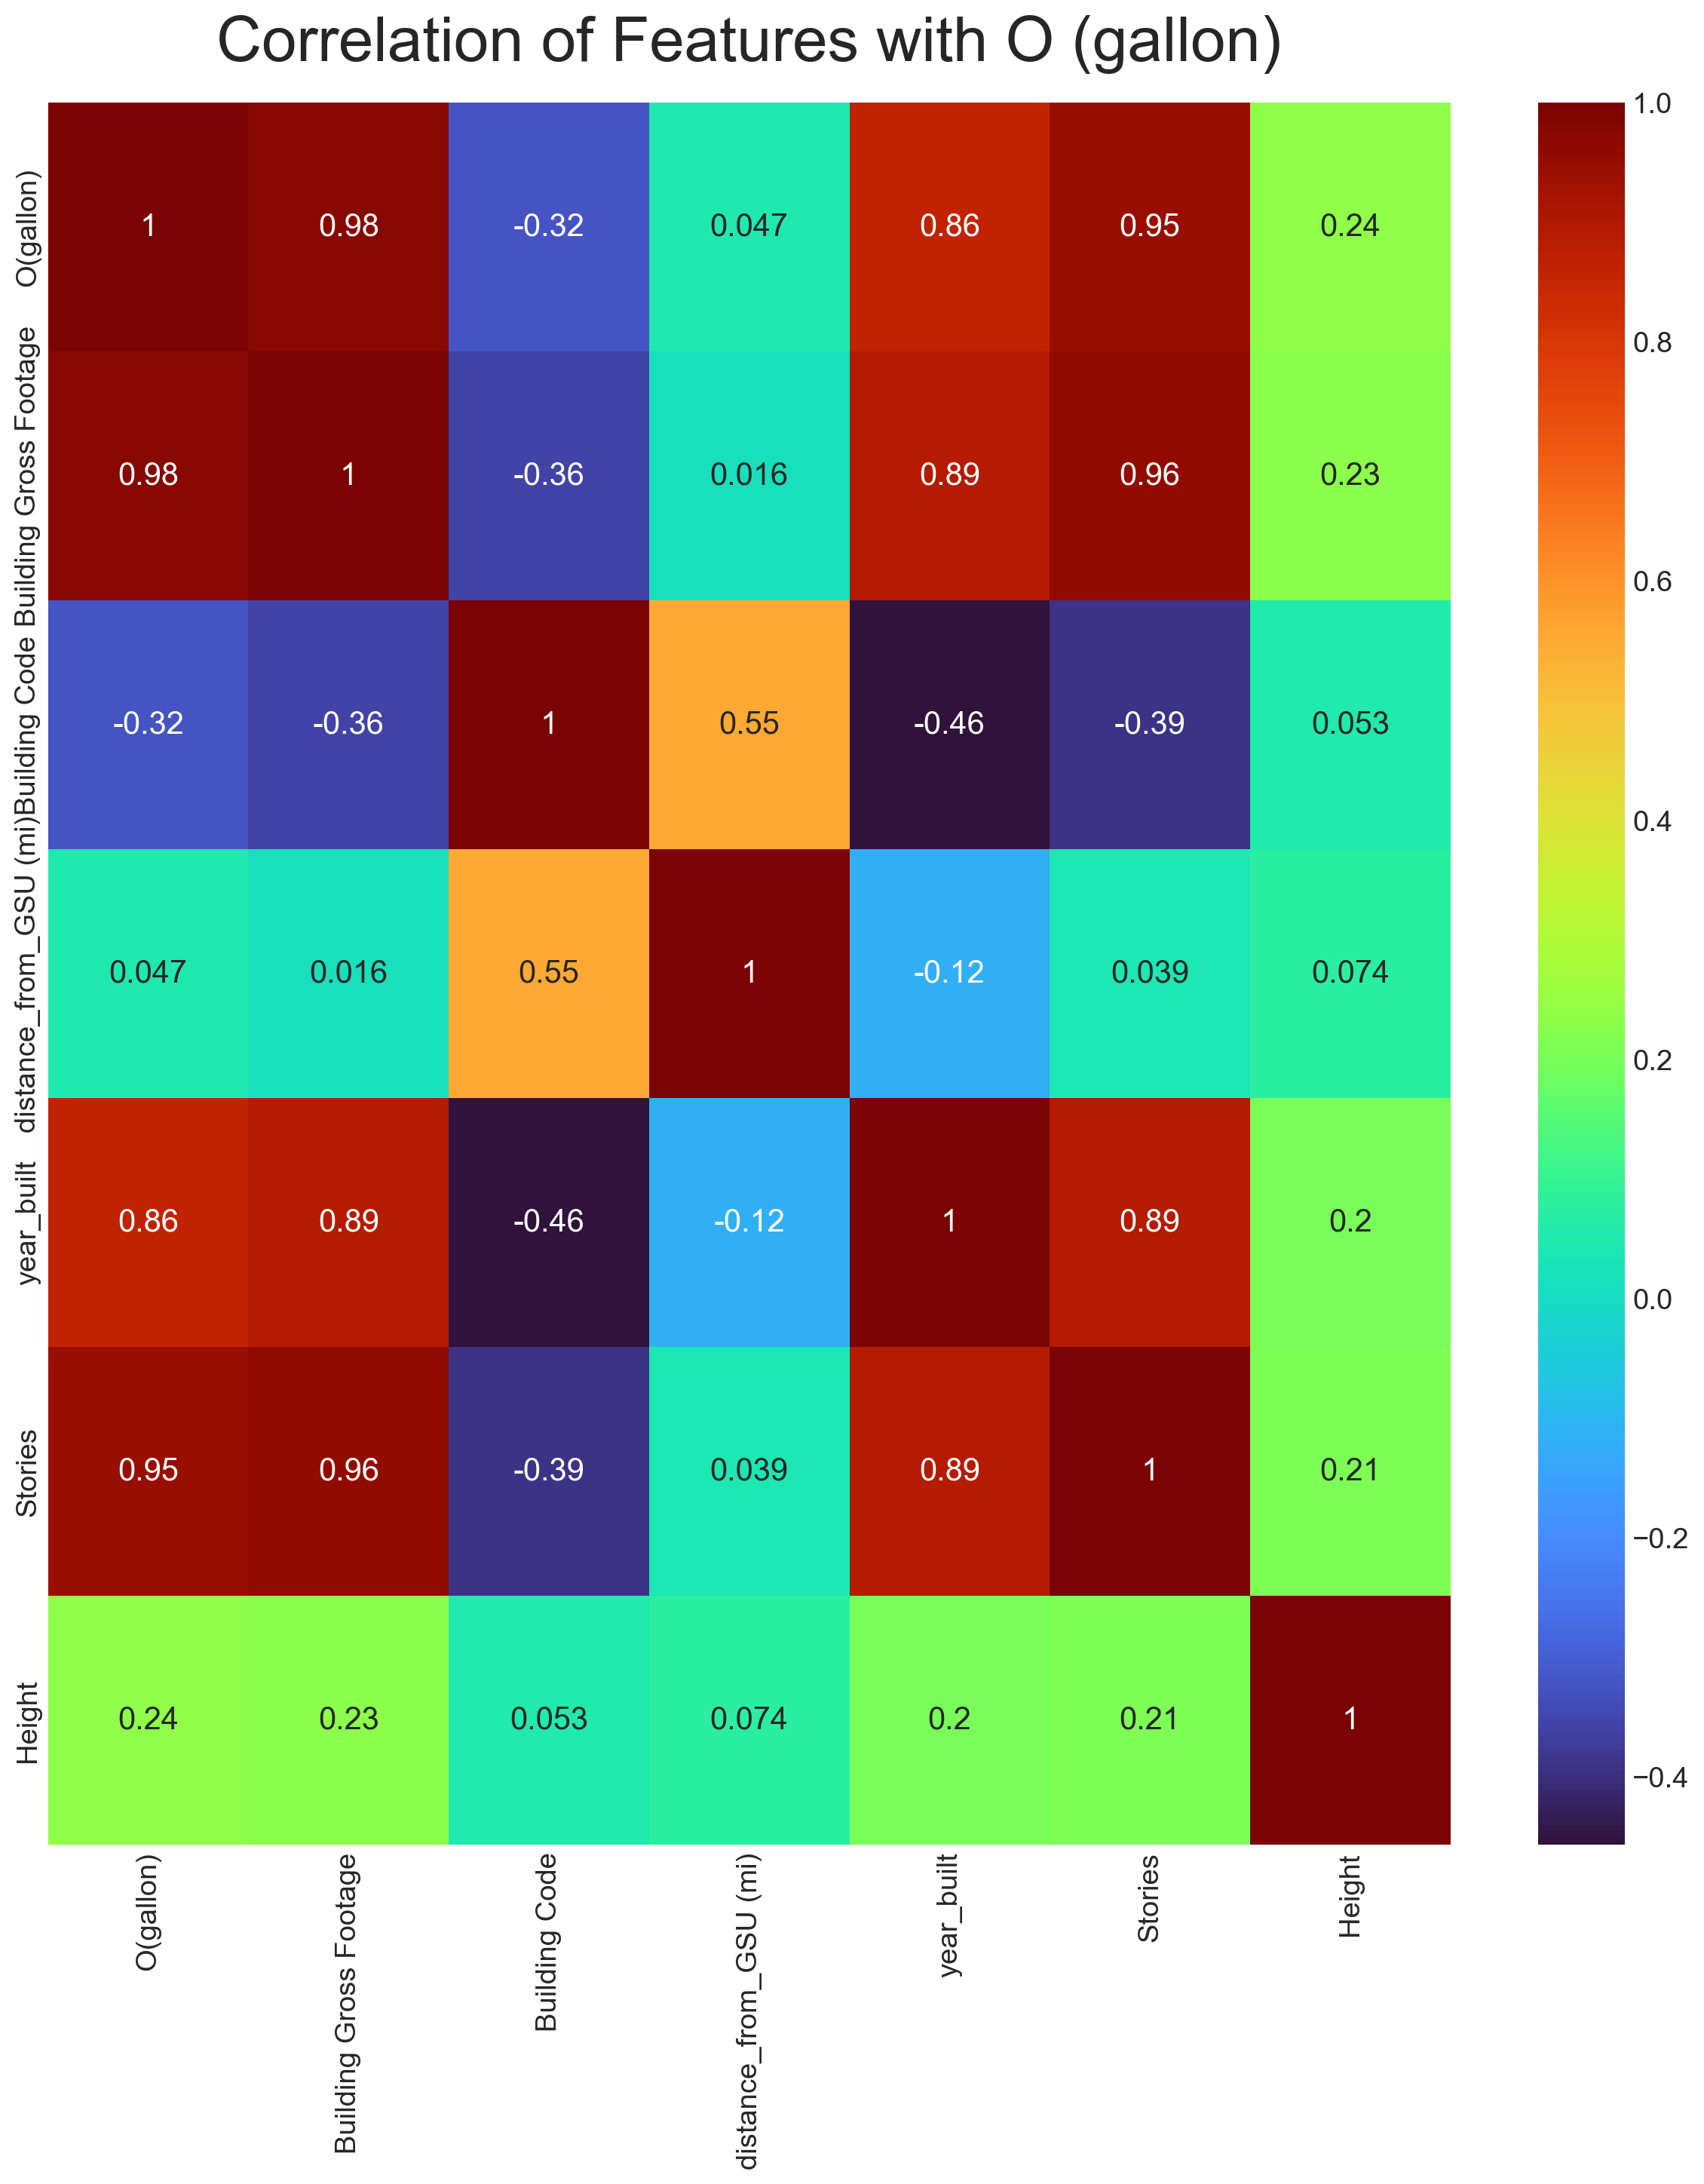

In [67]:
df_O_train = df[(df['O(gallon)'] > 0)].drop(['E (kWh)', 'G(therms)'], axis=1)
p_corr = df_O_train.corr(method='pearson')
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
sns.heatmap(p_corr, annot=True, cmap='turbo', ax=ax)
ax.set_title('Correlation of Features with O (gallon)', fontsize=30, pad=20)

In [68]:
fig.savefig('../../reports/figures/corr_O.svg', bbox_inches='tight')

In [69]:
df_O_train.head()

,O(gallon),Building Gross Footage,Building Code,distance_from_GSU (mi),year_built,Stories,Height
0,253894.7,384941.16,500,0.8,2000.0,19,195.0
1,2571.7,4961.74,506,0.6,1910.0,5,44.0
4,99773.0,203525.46,509,0.8,1926.0,10,80.0
6,3263.2,6507.28,720,0.7,1895.0,5,51.0
8,60751.4,113335.15,518,0.7,1923.0,10,96.0


In [70]:
df_train = df[(df['E (kWh)'] > 0) & (df['G(therms)'] > 0) & (df['O(gallon)'] > 0)]

In [71]:
df_train.head()

,E (kWh),G(therms),O(gallon),Building Gross Footage,Building Code,distance_from_GSU (mi),year_built,Stories,Height
0,13205241.58,1658548.0,253894.7,384941.16,500,0.8,2000.0,19,195.0
1,15476.00,852.0,2571.7,4961.74,506,0.6,1910.0,5,44.0
4,1201216.00,4408.0,99773.0,203525.46,509,0.8,1926.0,10,80.0
8,1266800.00,5469.0,60751.4,113335.15,518,0.7,1923.0,10,96.0
9,26833.00,1658.0,3544.3,11435.95,514,0.7,1899.0,6,58.0


In [72]:
eui = src.models.calc_eui.eui(df_train['E (kWh)'], df_train['G(therms)'],
                              df_train['O(gallon)'], df_train['Building Gross Footage'])
df_train['eui'] = eui.copy()
df_train.drop(['E (kWh)', 'G(therms)', 'O(gallon)', 'Building Gross Footage'], axis=1, inplace=True)


/var/folders/n2/pk82njb95y52mychzbkmz5zm0000gn/T/ipykernel_23619/1995233779.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['eui'] = eui.copy()
/var/folders/n2/pk82njb95y52mychzbkmz5zm0000gn/T/ipykernel_23619/1995233779.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.drop(['E (kWh)', 'G(therms)', 'O(gallon)', 'Building Gross Footage'], axis=1, inplace=True)


In [73]:
cols = ['eui', 'Building Code', 'distance_from_GSU (mi)', 'year_built', 'Stories',
       'Height']
df_train = df_train[cols]

<Axes: >

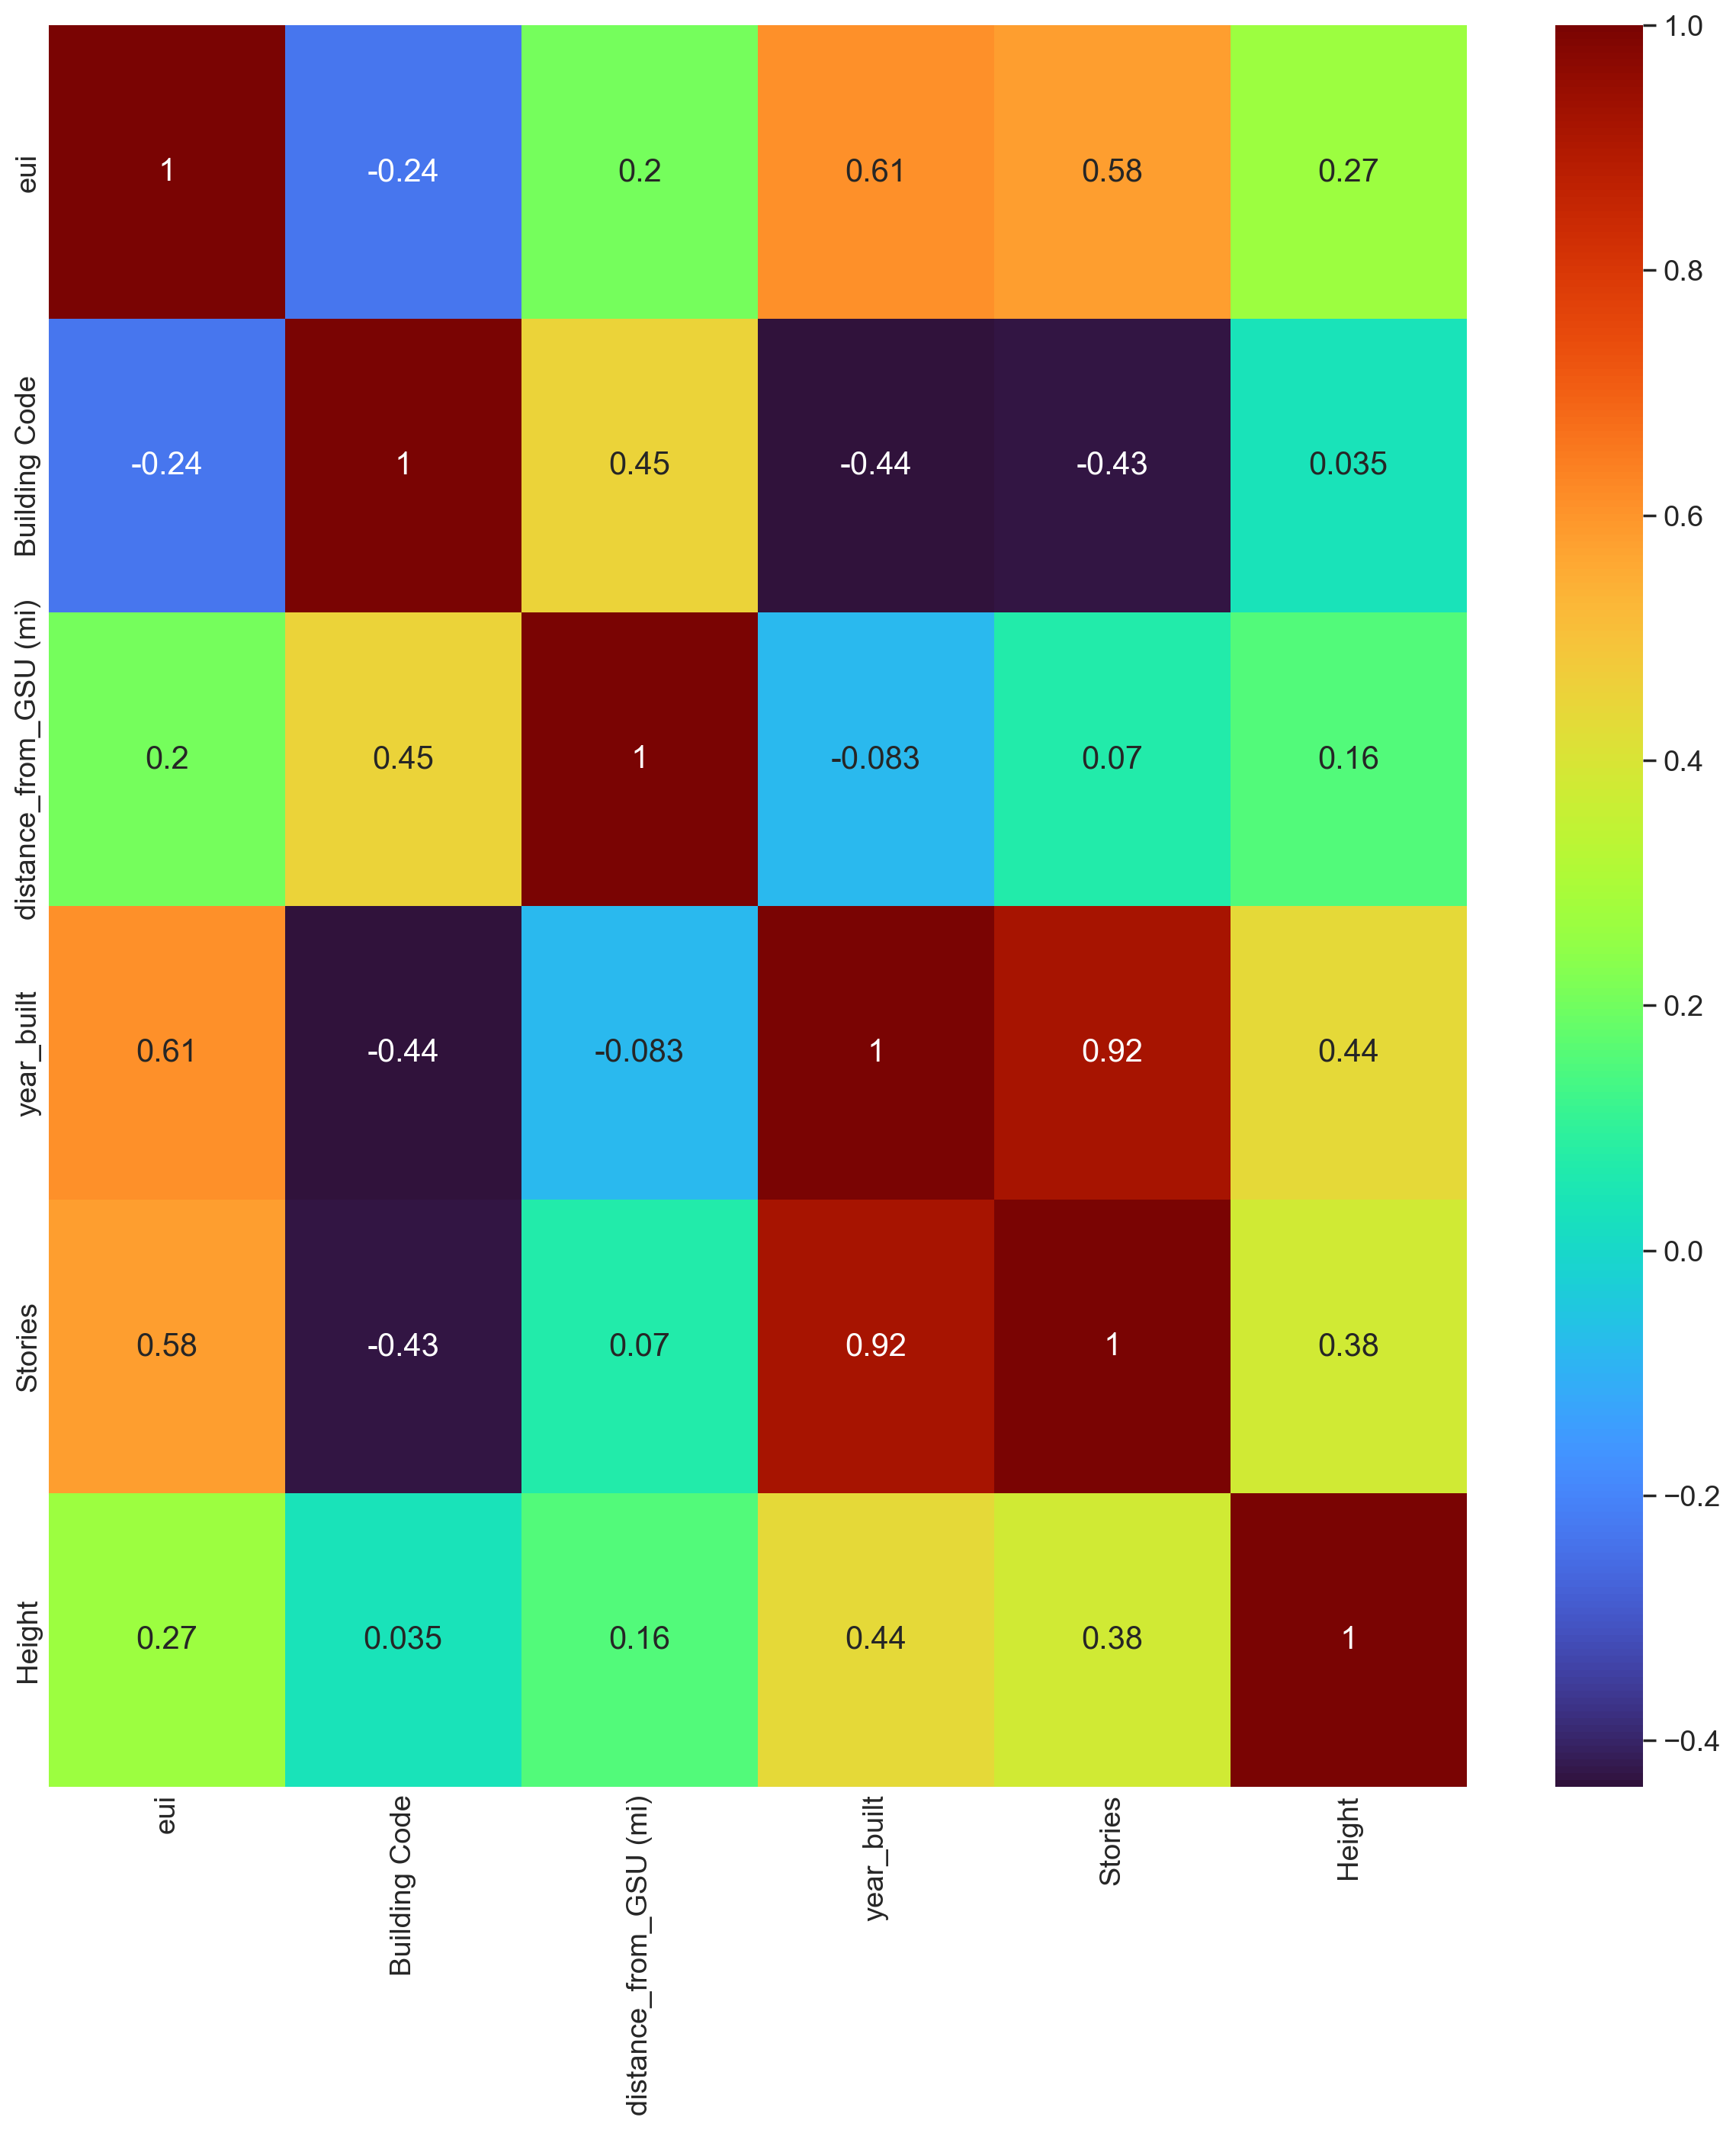

In [74]:
p_corr = df_train.corr(method='pearson')
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111)
sns.set(font_scale=1.25)
sns.heatmap(p_corr, annot=True, cmap='turbo', ax=ax)
# ax.set_title('Correlation of Features with EUI', fontsize=30, pad=20)


In [75]:
fig.savefig('../../reports/figures/corr_eui.svg', bbox_inches='tight')

In [76]:
(df_train.columns)

Index(['eui', 'Building Code', 'distance_from_GSU (mi)', 'year_built',
       'Stories', 'Height'],
      dtype='object')

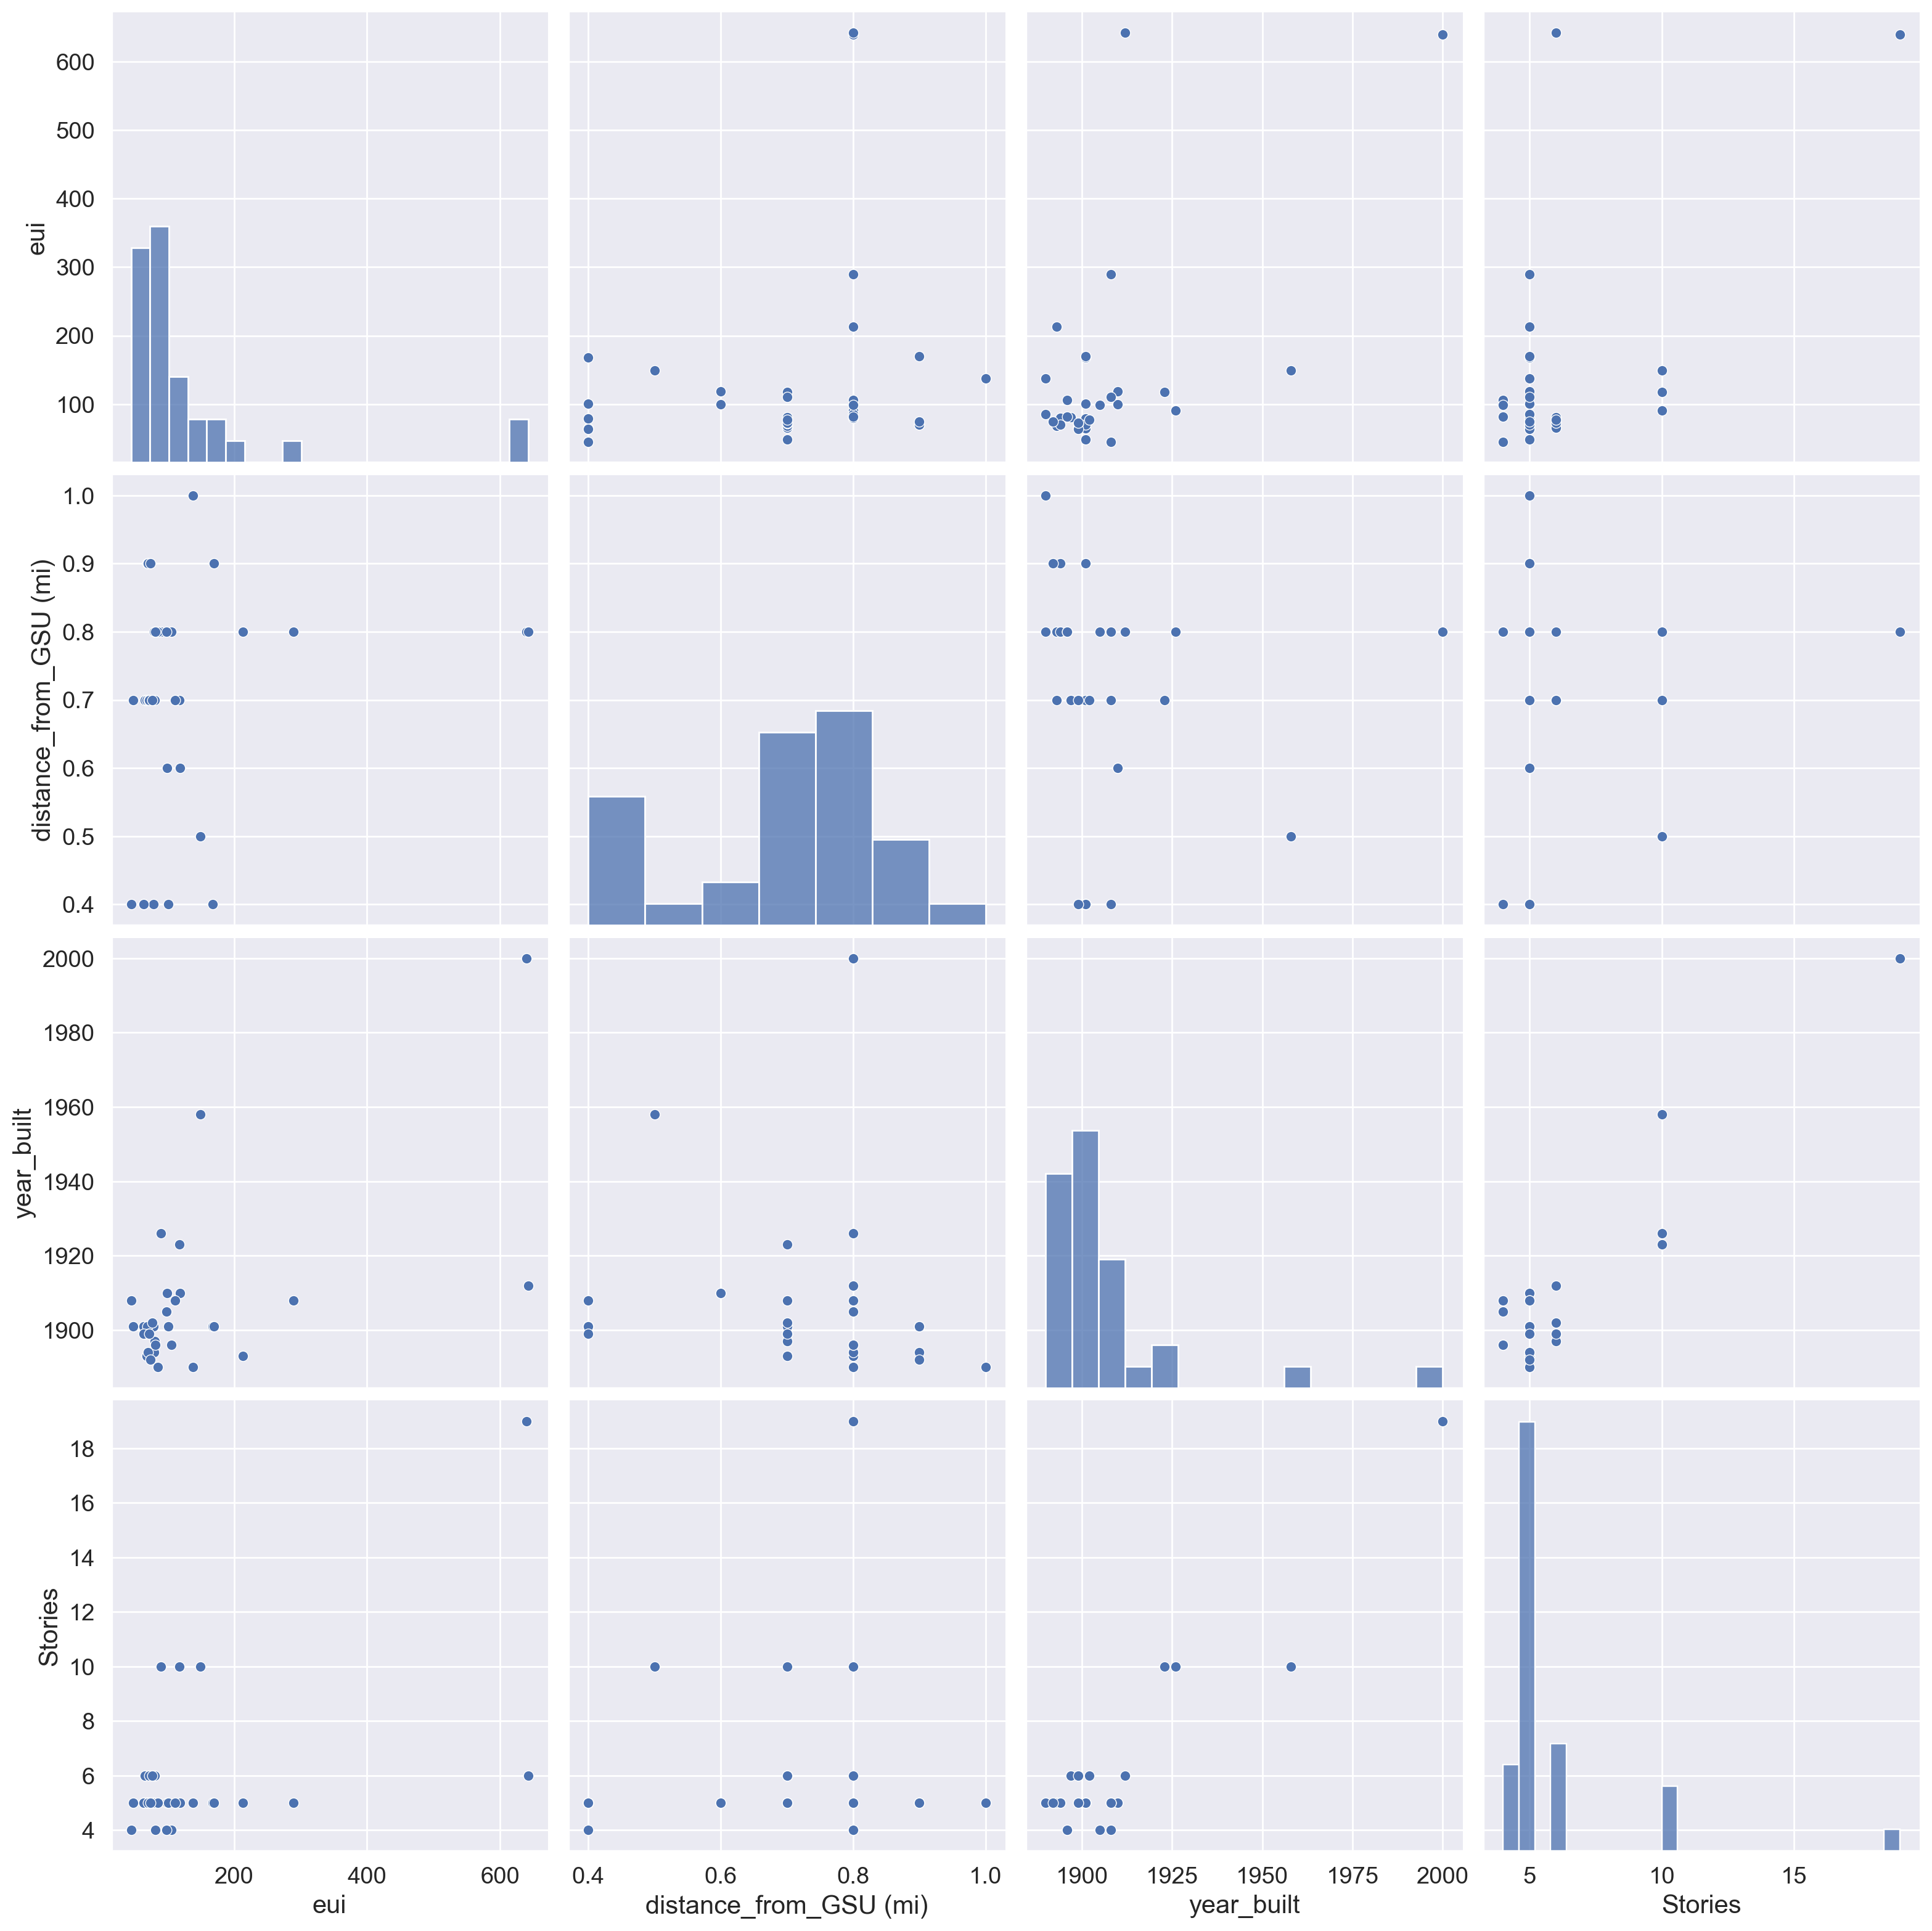

In [77]:
plot = sns.pairplot(data=df_train, vars=['eui', 'distance_from_GSU (mi)', 'year_built', 'Stories'], height=4)

In [78]:
plot.figure.savefig('../../reports/figures/feature.svg', bbox_inches='tight')

Text(0.5, 0, 'EUI')

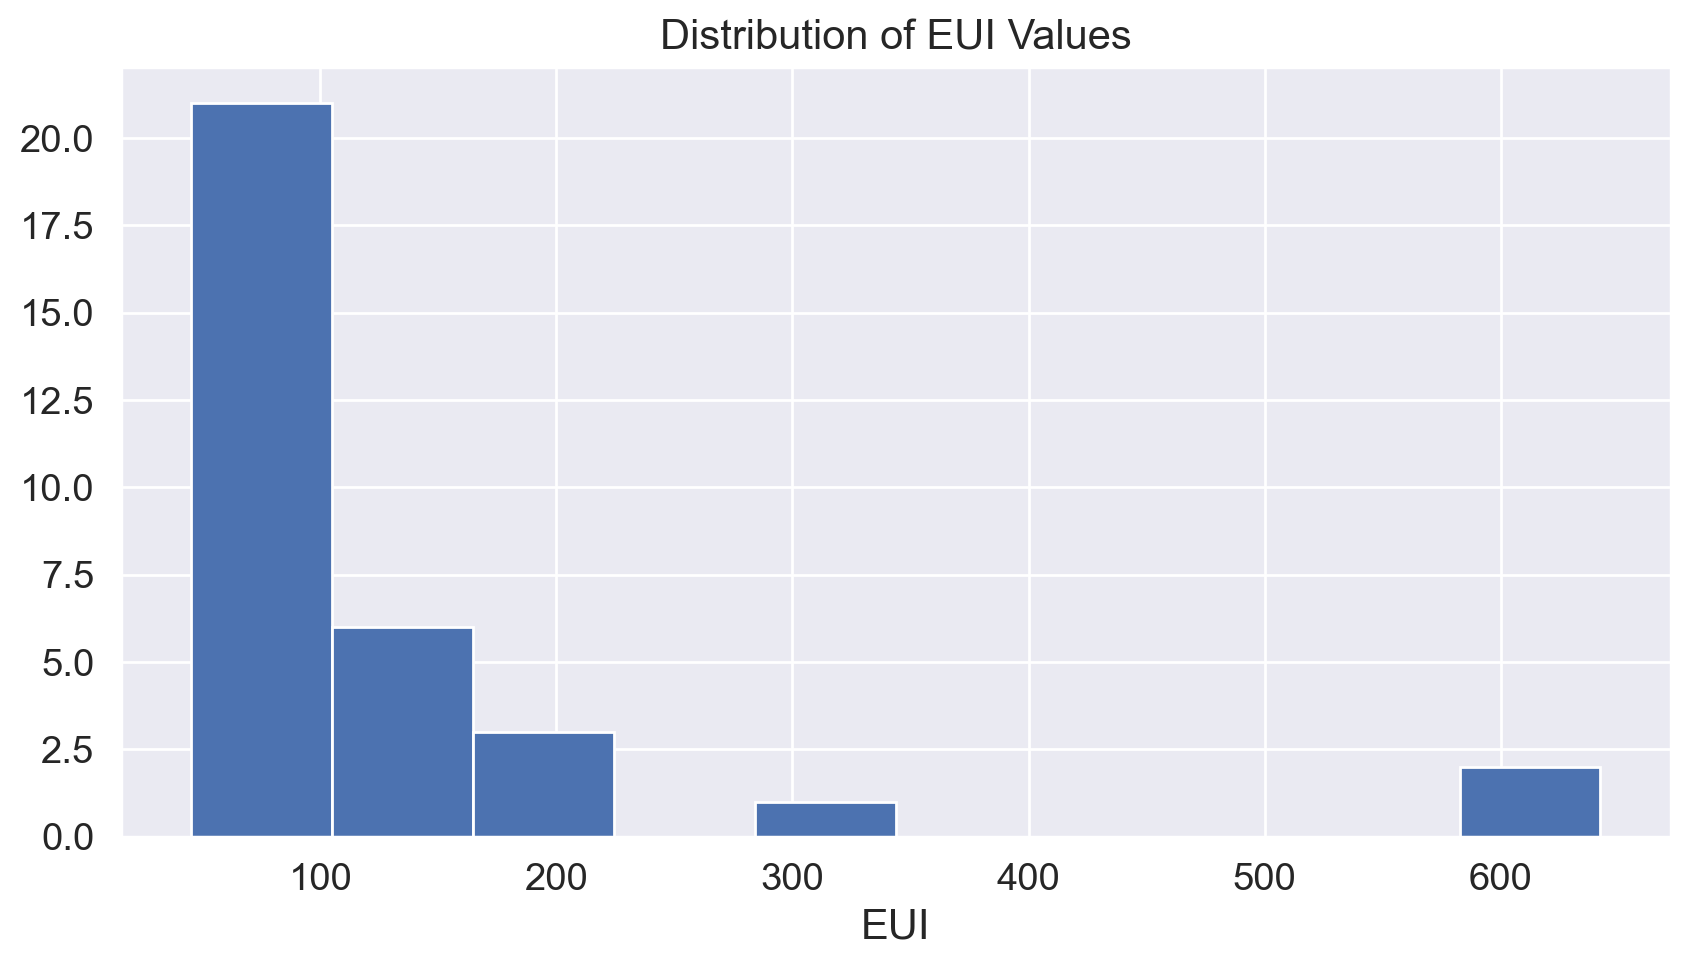

In [86]:
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
df_train.hist('eui', ax=ax)
ax.set_title('Distribution of EUI Values')
ax.set_xlabel('EUI')

In [87]:
fig.savefig('../../reports/figures/hist_eui.svg', bbox_inches='tight')

In [80]:
df_E_train.to_csv(DATA_PATH.joinpath('processed', 'df_E_train.csv'))
df_G_train.to_csv(DATA_PATH.joinpath('processed', 'df_G_train.csv'))
df_O_train.to_csv(DATA_PATH.joinpath('processed', 'df_O_train.csv'))
df_train.to_csv(DATA_PATH.joinpath('processed', 'df_train.csv'))

In [82]:
df_E_train.shape

(124, 7)

In [83]:
df_train['eui'].max()

642.2504829777353

In [84]:
df_train['eui'].min()

45.37148936989834